In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

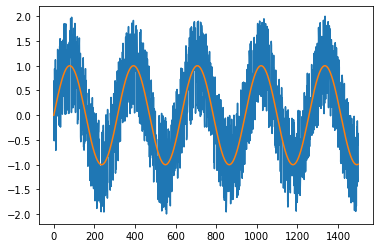

In [9]:
t = np.arange(0, 1500)
x = np.sin(0.02*t) + np.random.uniform(low=-1, high=1,size=(1500,))
plt.plot(x)

x_without_noise = np.sin(0.02*t)
plt.plot(x_without_noise)

In [5]:
print(t)

[   0    1    2 ... 1497 1498 1499]


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.47268718]
 [0.67307756]
 [0.37005021]
 ...
 [0.16176822]
 [0.40761572]
 [0.35008223]]


In [12]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [13]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)
print(trainX[0])

[[0.47268718]
 [0.67307756]
 [0.37005021]
 [0.51131047]
 [0.73446025]
 [0.6080536 ]
 [0.67855826]
 [0.5598003 ]
 [0.7798011 ]
 [0.58854793]]


In [14]:
print(trainY[0])

[0.32149275]


In [15]:
print(trainX.shape)

(990, 10, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [17]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX,trainY, epochs=500, batch_size=16, verbose=2)

Epoch 1/500
62/62 - 1s - loss: 0.3271 - 1s/epoch - 24ms/step
Epoch 2/500
62/62 - 0s - loss: 0.2393 - 144ms/epoch - 2ms/step
Epoch 3/500
62/62 - 0s - loss: 0.1768 - 148ms/epoch - 2ms/step
Epoch 4/500
62/62 - 0s - loss: 0.1299 - 162ms/epoch - 3ms/step
Epoch 5/500
62/62 - 0s - loss: 0.0941 - 170ms/epoch - 3ms/step
Epoch 6/500
62/62 - 0s - loss: 0.0712 - 163ms/epoch - 3ms/step
Epoch 7/500
62/62 - 0s - loss: 0.0605 - 151ms/epoch - 2ms/step
Epoch 8/500
62/62 - 0s - loss: 0.0568 - 154ms/epoch - 2ms/step
Epoch 9/500
62/62 - 0s - loss: 0.0551 - 155ms/epoch - 3ms/step
Epoch 10/500
62/62 - 0s - loss: 0.0539 - 152ms/epoch - 2ms/step
Epoch 11/500
62/62 - 0s - loss: 0.0530 - 148ms/epoch - 2ms/step
Epoch 12/500
62/62 - 0s - loss: 0.0523 - 147ms/epoch - 2ms/step
Epoch 13/500
62/62 - 0s - loss: 0.0517 - 153ms/epoch - 2ms/step
Epoch 14/500
62/62 - 0s - loss: 0.0513 - 162ms/epoch - 3ms/step
Epoch 15/500
62/62 - 0s - loss: 0.0509 - 146ms/epoch - 2ms/step
Epoch 16/500
62/62 - 0s - loss: 0.0506 - 146ms/epoc

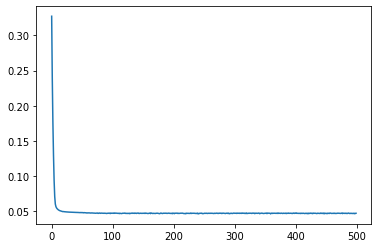

In [18]:
import matplotlib.pyplot as plt
 
loss = history.history['loss']
 
plt.plot(loss)

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [20]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict = normalizer.inverse_transform(model.predict(testX))

In [21]:
predicted = np.concatenate((trainPredict, testPredict))

In [22]:
x = normalizer.inverse_transform(x)

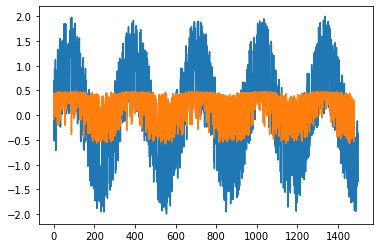

In [23]:
plt.plot(x)
plt.plot(predicted)